In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#read data
df = pd.read_csv('../../../Data/Cluster.csv',index_col='T',parse_dates=True)

In [3]:
df.head()

,S,Spread
T,,
2012-10-01,9.81,0.270914
2012-09-28,9.49,0.290254
2012-09-27,9.74,0.250696
2012-09-26,9.49,0.269219
2012-09-25,9.59,0.253442


In [4]:
#create data matrix
A = df.as_matrix()
#transform into vector
creditspread = A[:,-1].reshape(-1,1)
shareprice = A[:,0].reshape(-1,1)

In [5]:
X = np.log(shareprice[0,0]/shareprice)
Y= np.log(creditspread/creditspread[0,0])

In [6]:
ols = linear_model.LinearRegression( fit_intercept=False)
ols.fit(X,Y)

/Users/jandespiegeleer/anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [7]:
#R_Squared
ols.score(X,Y)
ols.coef_

array([[3.08446611]])

In [8]:
#Make a test (using the training sample)
shareprice_test = np.arange(5,12,0.1)
creditspread_test= creditspread[0,0] * np.exp(ols.coef_[0,0]*np.log(shareprice[0,0]/shareprice_test))

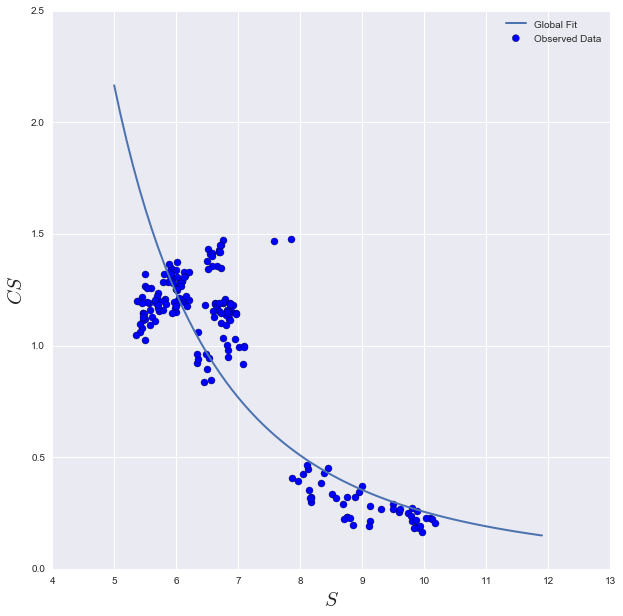

In [9]:
#plotthe results
fig = plt.figure(figsize=[10,10])
plt.scatter(shareprice,creditspread,label='Observed Data',s=50)
plt.plot(shareprice_test,creditspread_test, label='Global Fit',linewidth=2)
plt.xlabel('$S$',fontsize=20)
plt.ylabel('$CS$',fontsize=20)
plt.legend()

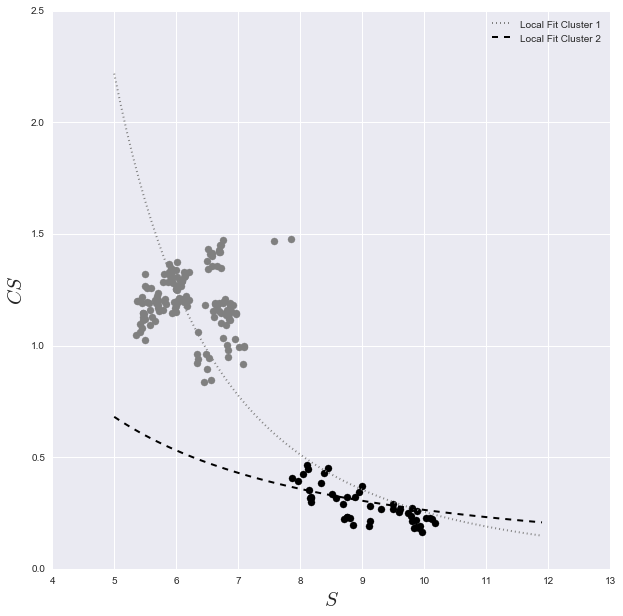

In [10]:
#plotting possible clustors
idx = (A[:,0]>7) &  (A[:,1]<0.81)

#first fit
X_1 =X[~idx]
Y_1 = Y[~idx]
ols_1 = linear_model.LinearRegression( fit_intercept=False)
ols_1.fit(X_1,Y_1)
R_1=ols_1.score(X_1,Y_1)
creditspread_1= creditspread[0,0] * np.exp(ols_1.coef_[0,0]*np.log(shareprice[0,0]/shareprice_test))

#second fit
X_2 =X[idx]
Y_2 = Y[idx]
ols_2 = linear_model.LinearRegression( fit_intercept=False)
ols_2.fit(X_2,Y_2)
R_2=ols_2.score(X_2,Y_2)
creditspread_2= creditspread[0,0] * np.exp(ols_2.coef_[0,0]*np.log(shareprice[0,0]/shareprice_test))


#plotthe results
fig = plt.figure(figsize=[10,10])
plt.scatter(shareprice[~idx],creditspread[~idx],s=50,color='gray')
plt.scatter(shareprice[idx],creditspread[idx],s=50,color='black')
plt.plot(shareprice_test,creditspread_1, label='Local Fit Cluster 1',linewidth=2,linestyle='dotted',color='gray')
plt.plot(shareprice_test,creditspread_2, label='Local Fit Cluster 2',linewidth=2,linestyle='--',color='black')

plt.xlabel('$S$',fontsize=20)
plt.ylabel('$CS$',fontsize=20)
plt.legend()